<a href="https://colab.research.google.com/github/Yusufahamed/Data-Analysis/blob/main/Project_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the sklearn model and metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# load the dataset

df = pd.read_csv("/content/new_telecom.csv")
df.head()

,CustomerID,TenureMonths,MonthlyCharges,TotalCharges,ContractMonths,InternetUsageGB,OnlineSecurityScore,OnlineBackupScore,DeviceProtectionScore,TechSupportScore,StreamingTVHours,StreamingMoviesHours,PaperlessBillingFlag,PaymentMethodScore,DependentsCount,ChurnProbability
0,1,52,114.30,5863.92,3,442,55,44,2,77,37.376142,84.603390,0,1,3,6.31
1,2,15,62.24,712.36,19,213,61,96,81,77,111.449522,134.731571,1,4,0,0.75
2,3,72,57.73,6626.16,18,219,33,32,25,88,129.520732,86.743925,0,2,1,30.02
3,4,61,113.63,4869.20,20,285,21,6,53,21,179.716636,64.844778,1,4,2,20.39
4,5,21,87.51,5648.91,2,243,67,21,39,51,90.037965,148.727533,0,2,3,14.72


In [ ]:
df.isnull().sum()

,0
CustomerID,0
TenureMonths,0
MonthlyCharges,0
TotalCharges,0
ContractMonths,0
InternetUsageGB,0
OnlineSecurityScore,0
OnlineBackupScore,0
DeviceProtectionScore,0
TechSupportScore,0


In [ ]:
df.shape

(3000, 16)

In [ ]:
X= df.drop(columns = ["ChurnProbability"])
y = df["ChurnProbability"]

In [ ]:
print(X.shape)
print(y.shape)

(3000, 15)
(3000,)


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# model

model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 44.452922210858134
R-squared: 0.5529725839469909


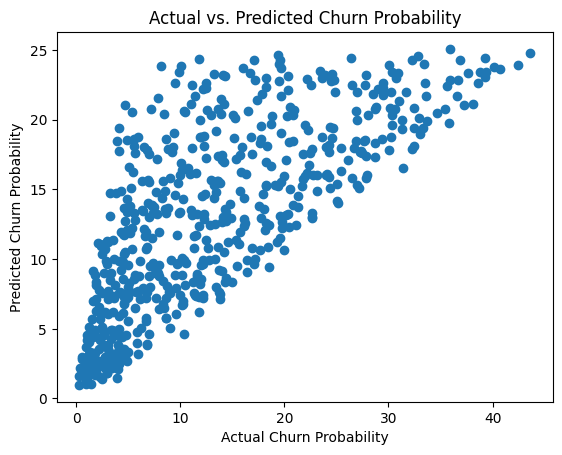

In [ ]:
# visual

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Churn Probability")
plt.ylabel("Predicted Churn Probability")
plt.title("Actual vs. Predicted Churn Probability")
plt.show()